In [ ]:
pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip list

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.13
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.24.0.34.4
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread            

In [ ]:
pip install bs4

In [ ]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
dfx = df[['Open', 'High', 'Low', 'Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

In [ ]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [ ]:
x = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
window_size = 10
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size]
    _y = y[i + window_size]
    data_x.append(_x)
    data_y.append(_y)

In [ ]:
train_size = int(len(data_y) * 0.7)
val_size = int(len(data_y) * 0.2)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])
val_x = np.array(data_x[train_size : train_size + val_size])
val_y = np.array(data_y[train_size : train_size + val_size])

test_size = len(data_y) - train_size - val_size
test_x = np.array(data_x[train_size + val_size : len(data_x)])
test_y = np.array(data_y[train_size + val_size : len(data_y)])

print('훈련 데이터의 크기 :', train_x.shape, train_y.shape)
print('검증 데이터의 크기 :', val_x.shape, val_y.shape)
print('테스트 데이터의 크기 :', test_x.shape, test_y.shape)

훈련 데이터의 크기 : (287, 10, 4) (287, 1)
검증 데이터의 크기 : (82, 10, 4) (82, 1)
테스트 데이터의 크기 : (42, 10, 4) (42, 1)


In [ ]:
# RNN
model = Sequential()
model.add(SimpleRNN(units=20, activation='tanh', return_sequences=True, input_shape=(window_size, 4)))
model.add(Dropout(0.1))
model.add(SimpleRNN(units=20,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 10, 20)              │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,341 (5.24 KB)

 Trainable params: 1,341 (5.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(window_size, 4)))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(units=20,activation='tanh'))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# GRU
model_gru = Sequential()
model_gru.add(GRU(units=20, activation='tanh', return_sequences=True, input_shape=(window_size, 4)))
model_gru.add(Dropout(0.1))
model_gru.add(GRU(units=20,activation='tanh'))
model_gru.add(Dropout(0.1))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')
model_gru.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 20)              │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 20)                  │           2,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,101 (16.02 KB)

 Trainable params: 4,101 (16.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y))


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0012
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0026
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - val_loss: 0.0011
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - val_loss: 0.0017
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - val_lo

In [ ]:
hist_lstm = model_lstm.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y))


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.1353 - val_loss: 0.0864
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0235 - val_loss: 0.0069
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0085 - val_loss: 0.0045
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0072 - val_loss: 0.0103
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0059 - val_loss: 0.0139
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0053 - val_loss: 0.0090
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0049 - val_loss: 0.0071
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0055 - val_loss: 0.0078
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0048 - val_loss: 0.0084
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0045 - val_loss: 0.0080
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0043 - val_lo

In [ ]:
hist_gru = model_gru.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(val_x, val_y))


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.2170 - val_loss: 0.1795
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0576 - val_loss: 0.0413
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0155 - val_loss: 0.0111
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0178 - val_loss: 0.0150
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0102 - val_loss: 0.0254
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0103 - val_loss: 0.0247
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081 - val_loss: 0.0187
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0066 - val_loss: 0.0154
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0070 - val_loss: 0.0141
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068 - val_loss: 0.0136
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0063 - val_loss: 0.0125
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0053 - val_lo

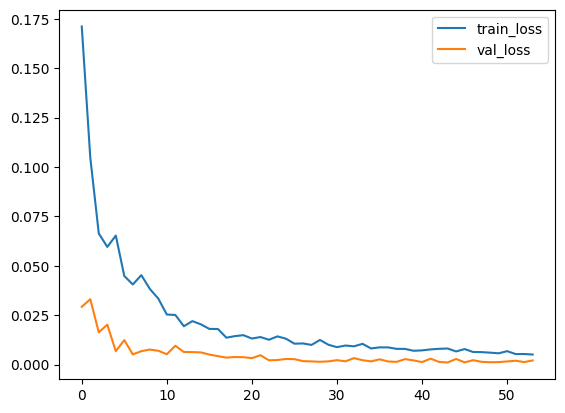

In [ ]:
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


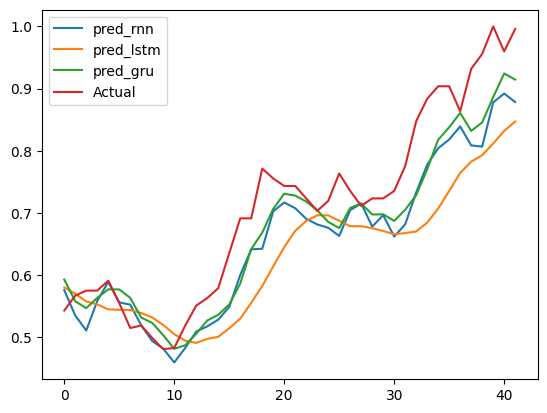

In [ ]:
pred = model.predict(test_x)
pred_lstm = model_lstm.predict(test_x)
pred_gru = model_gru.predict(test_x)
plt.plot(pred, label='pred_rnn')
plt.plot(pred_lstm, label='pred_lstm')
plt.plot(pred_gru, label='pred_gru')
plt.plot(test_y, label='Actual')
plt.legend()
plt.show()